In [35]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import ScalarMappable

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [43]:
# We transpose the matrix to let the years as columns
dfT = df.T
# Imprimimos estadistica simple
print(dfT.describe())
# We calculate mean value, standard deviation (std) and number of events (N)
mean = dfT.mean()
std = dfT.std()
count = dfT.count()
# We comeback to the original dataframe
dfo = dfT.T
# We save mean, std and N in new columns. Also we calculate 
dfo['N'] = count
dfo['mean'] = mean
dfo['std'] = std
dfo['err'] = (1.96)*std/np.sqrt(count)
columns_to_keep = ['N','mean','std','err']
dfo = dfo[columns_to_keep].dropna()
print(dfo.head())

                1992           1993           1994           1995
count    3650.000000    3650.000000    3650.000000    3650.000000
mean    33312.107476   41861.859541   39493.304941   47743.550969
std    200630.901553   98398.356203  140369.925240   69781.185469
min   -717071.175466 -321586.023683 -450827.613097 -189865.963265
25%   -102740.398364  -26628.302213  -57436.397393    1774.555612
50%     29674.931050   43001.976658   41396.781369   49404.322978
75%    167441.838695  108296.577923  137261.713785   94164.333867
max    817505.608159  395586.505068  490091.665037  320826.888044
         N          mean            std          err
1992  3650  33312.107476  200630.901553  6508.897970
1993  3650  41861.859541   98398.356203  3192.254314
1994  3650  39493.304941  140369.925240  4553.902287
1995  3650  47743.550969   69781.185469  2263.851744


Text(-0.5, 50000, 'y = 40000')

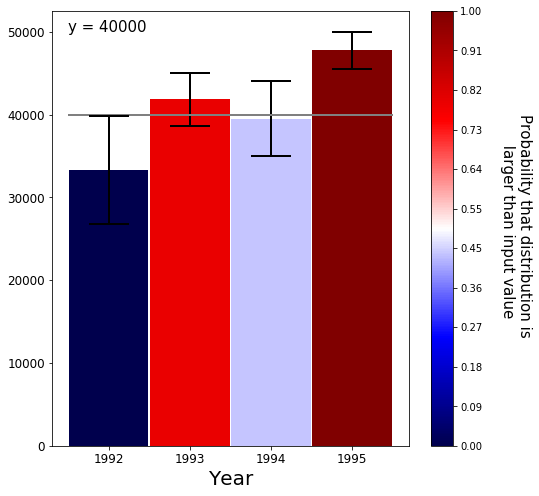

In [91]:
err = dfo['err']
years = [] #array to store the years
ymean = [] #array to store the mean values
#We save the index in the array years
for i in dfo.index:
    years.append(str(i))

#Create a function to calcuate the probability that the distribution is larger than a constant value
def prob_func(cte, ymax95, ymin95):
    return (ymin95 - cte)/(ymax95 - ymin95) + 1.0

#################
yvalue = 40000 ## Input value to compare with bars
#################

#Probalitity that the distribution is larger than a constant value
probability = []
#Loop over the years
for year in dfo.index:
    ymean.append(dfo.loc[year]['mean'])
    max95 = (dfo.loc[year]['mean']+dfo.loc[year]['err'])
    min95 = (dfo.loc[year]['mean']-dfo.loc[year]['err'])
    coef = prob_func(yvalue, max95, min95)
    if coef<0.0: probability.append(coef)
    if coef>1.0: probability.append(coef)
    if coef<1.0 and coef>0.0: probability.append(coef)

#We chose the colormap to do the colorbar. From dark blue to dark red (seismic)
my_cmap = plt.cm.get_cmap('seismic')
#We assign to each probability value a color of the colormap
colors = my_cmap(probability)
#We scale the color map from 0.0 to 1.0 with 12 representative values
bounds = np.linspace(0.0, 1.0, 12)

#We create the figure
fig,ax = plt.subplots(figsize=(8,8))
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,1))
sm.set_array([])
cbar = plt.colorbar(sm, ticks=bounds, format='%.2f')
ax.tick_params(labelsize=12)
cbar.set_label('Probability that distribution is \n larger than input value', rotation=270,
                                                                              labelpad=50,
                                                                              fontsize=15)
plt.xlabel('Year', fontsize=20)

#Create the barplot
plt.bar(years, ymean, width = 0.98,
                      color=colors, 
                      yerr=err,
                      ecolor='k',
                      alpha=1,
                      error_kw=dict(lw=2, capsize=20, capthick=2))
#Create the horizontal line according to the input value yvalue
plt.hlines(yvalue, xmin=-0.5, xmax=3.5, color='grey',
                                        linestyles='-',
                                        linewidth=2)
plt.annotate('y = {}'.format(yvalue), [-0.5,50000], fontsize=15)
#plt.savefig('Assignment3.pdf')
